Trabalho 1 Topicos Avançados

In [3]:
!pip3 install ucimlrepo

In [4]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

# data (as pandas dataframes)
X = breast_cancer_wisconsin_diagnostic.data.features
y = breast_cancer_wisconsin_diagnostic.data.targets

# types
print(type(X))
print(type(y))

# metadata
print(breast_cancer_wisconsin_diagnostic.metadata)

# variable information
print(breast_cancer_wisconsin_diagnostic.variables)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
{'uci_id': 17, 'name': 'Breast Cancer Wisconsin (Diagnostic)', 'repository_url': 'https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic', 'data_url': 'https://archive.ics.uci.edu/static/public/17/data.csv', 'abstract': 'Diagnostic Wisconsin Breast Cancer Database.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 569, 'num_features': 30, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Diagnosis'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1993, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5DW2B', 'creators': ['William Wolberg', 'Olvi Mangasarian', 'Nick Street', 'W. Street'], 'intro_paper': {'title': 'Nuclear feature extraction for breast tumor diagnosis', 'authors': 'W. Street, W. Wolberg, O. Mangasarian', 'published_in': 'Electro

In [17]:
# 1)
# Split data for training, validation and test 60, 20, 20
# Random selection of samples

from sklearn.model_selection import train_test_split
import numpy as np

X = np.asarray(X)
y = np.asarray(y)

# Size and shape
print(f"Train-Validation size: {len(X)}, shape: {X.shape}")
print(f"Test size: {len(y)} shape: {y.shape}")

# The samples
print(X[0])
print(len(X[0]))
labels = [label for label in y]
print(labels)


# Splitting train-validation and test 80 - 20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Splitting train into train and validation 80 - 20
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)

print(f"Train size: {len(X_train)}, shape: {X_train.shape}")
print(f"Validation size: {len(X_val)}, shape: {X_val.shape}")
print(f"Test size: {len(X_test)} shape: {X_test.shape}")

# Ecnoding the labels
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(y_train)
y_train = le.transform(y_train)
y_val = le.transform(y_val)
y_test = le.transform(y_test)


Train-Validation size: 569, shape: (569, 30)
Test size: 569 shape: (569, 1)
[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
 1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
 6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
 1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
 4.601e-01 1.189e-01]
30
[array(['M'], dtype=object), array(['M'], dtype=object), array(['M'], dtype=object), array(['M'], dtype=object), array(['M'], dtype=object), array(['M'], dtype=object), array(['M'], dtype=object), array(['M'], dtype=object), array(['M'], dtype=object), array(['M'], dtype=object), array(['M'], dtype=object), array(['M'], dtype=object), array(['M'], dtype=object), array(['M'], dtype=object), array(['M'], dtype=object), array(['M'], dtype=object), array(['M'], dtype=object), array(['M'], dtype=object), array(['M'], dtype=object), array(['B'], dtype=object), array(['B'], dtype=object), array(['B'], dtype=object)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was 

In [18]:
# Create the models
# 1) (a) No Regularization

# Creating the net2n Neural Net with two neurons
import tensorflow as tf

a_net2n = tf.keras.Sequential()
a_net2n.add(tf.keras.Input(shape=(30,)))
a_net2n.add(tf.keras.layers.Dense(8))
a_net2n.add(tf.keras.layers.Dense(4))
a_net2n.add(tf.keras.layers.Dense(1, activation="sigmoid"))
a_net2n.summary()

a_net2n.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=[
        tf.keras.metrics.BinaryAccuracy(),
        tf.keras.metrics.FalseNegatives()]
        )

# 1) (b) No Regularization and Early Stop with patiente 3
b_net2n = tf.keras.Sequential()
b_net2n.add(tf.keras.Input(shape=(30,)))
b_net2n.add(tf.keras.layers.Dense(8))
b_net2n.add(tf.keras.layers.Dense(4))
b_net2n.add(tf.keras.layers.Dense(1, activation="sigmoid"))
b_net2n.summary()

b_net2n.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=[
        tf.keras.metrics.BinaryAccuracy(),
        tf.keras.metrics.FalseNegatives(),
    ])

# 1) (c) Regularization L2 on the two layers
c_net2n_reg = tf.keras.Sequential()
c_net2n_reg.add(tf.keras.Input(shape=(30,)))
c_net2n_reg.add(tf.keras.layers.Dense(8, kernel_regularizer='l2'))
c_net2n_reg.add(tf.keras.layers.Dense(4, kernel_regularizer='l2'))
c_net2n_reg.add(tf.keras.layers.Dense(1, activation="sigmoid"))
c_net2n_reg.summary()

c_net2n_reg.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=[
        tf.keras.metrics.BinaryAccuracy(),
        tf.keras.metrics.FalseNegatives(),
    ])

# 1) (d) Regularization L1 on the two layers
d_net2n_reg = tf.keras.Sequential()
d_net2n_reg.add(tf.keras.Input(shape=(30,)))
d_net2n_reg.add(tf.keras.layers.Dense(8, kernel_regularizer='l1'))
d_net2n_reg.add(tf.keras.layers.Dense(4, kernel_regularizer='l1'))
d_net2n_reg.add(tf.keras.layers.Dense(1, activation="sigmoid"))
d_net2n_reg.summary()

d_net2n_reg.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=[
        tf.keras.metrics.BinaryAccuracy(),
        tf.keras.metrics.FalseNegatives(),
    ])


# 1) (e) Dropout 30%  on the second layer
e_net2n_reg = tf.keras.Sequential()
e_net2n_reg.add(tf.keras.Input(shape=(30,)))
e_net2n_reg.add(tf.keras.layers.Dense(8))
e_net2n_reg.add(tf.keras.layers.Dropout(0.3))
e_net2n_reg.add(tf.keras.layers.Dense(4))
e_net2n_reg.add(tf.keras.layers.Dense(1, activation="sigmoid"))
e_net2n_reg.summary()

e_net2n_reg.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=[
        tf.keras.metrics.BinaryAccuracy(),
        tf.keras.metrics.FalseNegatives(),
    ])


# 1) (f) Dropout of 30% òn the second layer and Regularization L2 on all the layers
f_net2n_reg = tf.keras.Sequential()
f_net2n_reg.add(tf.keras.Input(shape=(30,)))
f_net2n_reg.add(tf.keras.layers.Dense(8, kernel_regularizer='l2'))
f_net2n_reg.add(tf.keras.layers.Dropout(0.3))
f_net2n_reg.add(tf.keras.layers.Dense(4, kernel_regularizer='l2'))
f_net2n_reg.add(tf.keras.layers.Dense(1, activation="sigmoid",
                                    kernel_regularizer='l2'))
f_net2n_reg.summary()

f_net2n_reg.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=[
        tf.keras.metrics.BinaryAccuracy(),
        tf.keras.metrics.FalseNegatives(),
    ])

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_21 (Dense)                     │ (None, 8)                   │             248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 4)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 289 (1.13 KB)

 Trainable params: 289 (1.13 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_24 (Dense)                     │ (None, 8)                   │             248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 4)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 289 (1.13 KB)

 Trainable params: 289 (1.13 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_27 (Dense)                     │ (None, 8)                   │             248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 4)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 289 (1.13 KB)

 Trainable params: 289 (1.13 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_30 (Dense)                     │ (None, 8)                   │             248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 4)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 289 (1.13 KB)

 Trainable params: 289 (1.13 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_33 (Dense)                     │ (None, 8)                   │             248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_34 (Dense)                     │ (None, 4)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_35 (Dense)                     │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 289 (1.13 KB)

 Trainable params: 289 (1.13 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_36 (Dense)                     │ (None, 8)                   │             248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_37 (Dense)                     │ (None, 4)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_38 (Dense)                     │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 289 (1.13 KB)

 Trainable params: 289 (1.13 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
from subprocess import call
import tensorflow as tf
# Hyperparameters
EPOCHS = 300

# Callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    verbose=1,
    patience=3,
    mode='min',
    restore_best_weights=True)

# Define checkpoint callbacks for each model
# Define checkpoint callbacks for each model
checkpoint_callbacks = {
    'a': tf.keras.callbacks.ModelCheckpoint('model_a_checkpoint.keras', save_best_only=True),
    'b': tf.keras.callbacks.ModelCheckpoint('model_b_checkpoint.keras', save_best_only=True),
    'c': tf.keras.callbacks.ModelCheckpoint('model_c_checkpoint.keras', save_best_only=True),
    'd': tf.keras.callbacks.ModelCheckpoint('model_d_checkpoint.keras', save_best_only=True),
    'e': tf.keras.callbacks.ModelCheckpoint('model_e_checkpoint.keras', save_best_only=True),
    'f': tf.keras.callbacks.ModelCheckpoint('model_f_checkpoint.keras', save_best_only=True),
}

# checkpoint_filepath = '/tmp/ckpt/checkpoint.model.keras'
# model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
#     filepath=checkpoint_filepath,
#     monitor='val_accuracy',
#     mode='max',
#     save_best_only=True)

# b_checkpoint_filepath = '/tmp/ckpt/checkpoint.model.keras'
# model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
#     filepath=b_checkpoint_filepath,
#     monitor='val_accuracy',
#     mode='max',
#     save_best_only=True)

# c_checkpoint_filepath = '/tmp/ckpt/checkpoint.model.keras'
# model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
#     filepath=c_checkpoint_filepath,
#     monitor='val_accuracy',
#     mode='max',
#     save_best_only=True)

# d_checkpoint_filepath = '/tmp/ckpt/checkpoint.model.keras'
# model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
#     filepath=d_checkpoint_filepath,
#     monitor='val_accuracy',
#     mode='max',
#     save_best_only=True)

# e_checkpoint_filepath = '/tmp/ckpt/checkpoint.model.keras'
# model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
#     filepath=e_checkpoint_filepath,
#     monitor='val_accuracy',
#     mode='max',
#     save_best_only=True)

# f_checkpoint_filepath = '/tmp/ckpt/checkpoint.model.keras'
# model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
#     filepath=f_checkpoint_filepath,
#     monitor='val_accuracy',
#     mode='max',
#     save_best_only=True)




In [20]:

# a) Training the net2n
a_history = a_net2n.fit(
      X_train, y_train,
      epochs=EPOCHS,
      validation_data=(X_val, y_val),
      verbose=2,
      callbacks=[checkpoint_callbacks['a']]
      )
print(a_history.history.keys())


Epoch 1/300
12/12 - 3s - 219ms/step - binary_accuracy: 0.3434 - false_negatives_7: 0.0000e+00 - loss: 70.1241 - val_binary_accuracy: 0.3626 - val_false_negatives_7: 0.0000e+00 - val_loss: 41.5181
Epoch 2/300
12/12 - 0s - 14ms/step - binary_accuracy: 0.3077 - false_negatives_7: 21.0000 - loss: 23.2710 - val_binary_accuracy: 0.5824 - val_false_negatives_7: 33.0000 - val_loss: 7.4101
Epoch 3/300
12/12 - 0s - 22ms/step - binary_accuracy: 0.3874 - false_negatives_7: 115.0000 - loss: 11.9964 - val_binary_accuracy: 0.3516 - val_false_negatives_7: 2.0000 - val_loss: 6.3110
Epoch 4/300
12/12 - 0s - 9ms/step - binary_accuracy: 0.2473 - false_negatives_7: 56.0000 - loss: 7.3486 - val_binary_accuracy: 0.3956 - val_false_negatives_7: 15.0000 - val_loss: 2.6667
Epoch 5/300
12/12 - 0s - 10ms/step - binary_accuracy: 0.3049 - false_negatives_7: 68.0000 - loss: 5.0466 - val_binary_accuracy: 0.3956 - val_false_negatives_7: 5.0000 - val_loss: 2.8141
Epoch 6/300
12/12 - 0s - 8ms/step - binary_accuracy: 0.4

In [21]:
# 1)  (b) Training the net2n
b_history = b_net2n.fit(
      X_train, y_train,
      epochs=EPOCHS,
      validation_data=(X_val, y_val),
      verbose=2,
      callbacks=[early_stopping, checkpoint_callbacks["b"]])

Epoch 1/300
12/12 - 2s - 152ms/step - binary_accuracy: 0.3956 - false_negatives_8: 0.0000e+00 - loss: 20.1331 - val_binary_accuracy: 0.7802 - val_false_negatives_8: 4.0000 - val_loss: 1.7665
Epoch 2/300
12/12 - 0s - 26ms/step - binary_accuracy: 0.8764 - false_negatives_8: 34.0000 - loss: 2.0133 - val_binary_accuracy: 0.7582 - val_false_negatives_8: 22.0000 - val_loss: 5.4001
Epoch 3/300
12/12 - 0s - 8ms/step - binary_accuracy: 0.8901 - false_negatives_8: 40.0000 - loss: 1.6142 - val_binary_accuracy: 0.8681 - val_false_negatives_8: 8.0000 - val_loss: 1.2354
Epoch 4/300
12/12 - 0s - 13ms/step - binary_accuracy: 0.9313 - false_negatives_8: 4.0000 - loss: 0.5263 - val_binary_accuracy: 0.8352 - val_false_negatives_8: 6.0000 - val_loss: 1.1993
Epoch 5/300
12/12 - 0s - 8ms/step - binary_accuracy: 0.9286 - false_negatives_8: 10.0000 - loss: 0.5632 - val_binary_accuracy: 0.8791 - val_false_negatives_8: 10.0000 - val_loss: 1.4906
Epoch 6/300
12/12 - 0s - 13ms/step - binary_accuracy: 0.9341 - fal

In [22]:
# 1) (c) Training the net2n_reg
c_history = c_net2n_reg.fit(
      X_train, y_train,
      epochs=EPOCHS,
      validation_data=(X_val, y_val),
      verbose=2,
      callbacks=[checkpoint_callbacks['c']]
      )

Epoch 1/300
12/12 - 2s - 158ms/step - binary_accuracy: 0.2527 - false_negatives_9: 34.0000 - loss: 52.4257 - val_binary_accuracy: 0.1099 - val_false_negatives_9: 25.0000 - val_loss: 26.8369
Epoch 2/300
12/12 - 0s - 8ms/step - binary_accuracy: 0.1703 - false_negatives_9: 118.0000 - loss: 42.3329 - val_binary_accuracy: 0.1319 - val_false_negatives_9: 25.0000 - val_loss: 23.8560
Epoch 3/300
12/12 - 0s - 10ms/step - binary_accuracy: 0.1291 - false_negatives_9: 84.0000 - loss: 34.5915 - val_binary_accuracy: 0.1978 - val_false_negatives_9: 15.0000 - val_loss: 24.1603
Epoch 4/300
12/12 - 0s - 9ms/step - binary_accuracy: 0.1621 - false_negatives_9: 69.0000 - loss: 29.8291 - val_binary_accuracy: 0.1429 - val_false_negatives_9: 21.0000 - val_loss: 18.3192
Epoch 5/300
12/12 - 0s - 12ms/step - binary_accuracy: 0.1401 - false_negatives_9: 105.0000 - loss: 25.0571 - val_binary_accuracy: 0.1648 - val_false_negatives_9: 23.0000 - val_loss: 14.9863
Epoch 6/300
12/12 - 0s - 8ms/step - binary_accuracy: 0

In [23]:
# 1) (d) Training the net2n_reg
d_history = d_net2n_reg.fit(
      X_train, y_train,
      epochs=EPOCHS,
      validation_data=(X_val, y_val),
      verbose=2,
      callbacks=[checkpoint_callbacks['d']]
      )

Epoch 1/300
12/12 - 2s - 160ms/step - binary_accuracy: 0.3434 - false_negatives_10: 0.0000e+00 - loss: 117.2372 - val_binary_accuracy: 0.3626 - val_false_negatives_10: 0.0000e+00 - val_loss: 80.9301
Epoch 2/300
12/12 - 0s - 23ms/step - binary_accuracy: 0.3352 - false_negatives_10: 3.0000 - loss: 54.4247 - val_binary_accuracy: 0.2857 - val_false_negatives_10: 7.0000 - val_loss: 22.6772
Epoch 3/300
12/12 - 0s - 13ms/step - binary_accuracy: 0.2500 - false_negatives_10: 102.0000 - loss: 24.0284 - val_binary_accuracy: 0.3736 - val_false_negatives_10: 30.0000 - val_loss: 16.5012
Epoch 4/300
12/12 - 0s - 11ms/step - binary_accuracy: 0.1951 - false_negatives_10: 92.0000 - loss: 20.1037 - val_binary_accuracy: 0.2637 - val_false_negatives_10: 9.0000 - val_loss: 15.7423
Epoch 5/300
12/12 - 0s - 9ms/step - binary_accuracy: 0.1676 - false_negatives_10: 65.0000 - loss: 16.1676 - val_binary_accuracy: 0.1319 - val_false_negatives_10: 23.0000 - val_loss: 10.1894
Epoch 6/300
12/12 - 0s - 12ms/step - bin

In [24]:
# 1) (e) Training the net2n_reg
e_history = e_net2n_reg.fit(
      X_train, y_train,
      epochs=EPOCHS,
      validation_data=(X_val, y_val),
      verbose=2,
      callbacks=[checkpoint_callbacks['e']]
      )

Epoch 1/300
12/12 - 2s - 191ms/step - binary_accuracy: 0.5357 - false_negatives_11: 117.0000 - loss: 167.9300 - val_binary_accuracy: 0.6374 - val_false_negatives_11: 33.0000 - val_loss: 82.0408
Epoch 2/300
12/12 - 0s - 31ms/step - binary_accuracy: 0.5247 - false_negatives_11: 104.0000 - loss: 126.7803 - val_binary_accuracy: 0.5495 - val_false_negatives_11: 32.0000 - val_loss: 35.1866
Epoch 3/300
12/12 - 0s - 9ms/step - binary_accuracy: 0.4341 - false_negatives_11: 77.0000 - loss: 92.6421 - val_binary_accuracy: 0.1209 - val_false_negatives_11: 23.0000 - val_loss: 26.4735
Epoch 4/300
12/12 - 0s - 11ms/step - binary_accuracy: 0.3736 - false_negatives_11: 67.0000 - loss: 91.0604 - val_binary_accuracy: 0.1758 - val_false_negatives_11: 18.0000 - val_loss: 26.3116
Epoch 5/300
12/12 - 0s - 12ms/step - binary_accuracy: 0.3654 - false_negatives_11: 60.0000 - loss: 79.4125 - val_binary_accuracy: 0.1648 - val_false_negatives_11: 24.0000 - val_loss: 22.8292
Epoch 6/300
12/12 - 0s - 12ms/step - bina

In [25]:
# 1) (f) Training the net2n_reg
f_history = f_net2n_reg.fit(
      X_train, y_train,
      epochs=EPOCHS,
      validation_data=(X_val, y_val),
      verbose=2,
      callbacks=[checkpoint_callbacks['f']]
      )

Epoch 1/300
12/12 - 2s - 173ms/step - binary_accuracy: 0.6429 - false_negatives_12: 102.0000 - loss: 362.8808 - val_binary_accuracy: 0.6374 - val_false_negatives_12: 33.0000 - val_loss: 223.9188
Epoch 2/300
12/12 - 0s - 25ms/step - binary_accuracy: 0.6044 - false_negatives_12: 93.0000 - loss: 318.0682 - val_binary_accuracy: 0.6374 - val_false_negatives_12: 33.0000 - val_loss: 152.6581
Epoch 3/300
12/12 - 0s - 25ms/step - binary_accuracy: 0.5522 - false_negatives_12: 74.0000 - loss: 217.8041 - val_binary_accuracy: 0.6374 - val_false_negatives_12: 33.0000 - val_loss: 104.3331
Epoch 4/300
12/12 - 0s - 12ms/step - binary_accuracy: 0.5385 - false_negatives_12: 72.0000 - loss: 223.8939 - val_binary_accuracy: 0.6374 - val_false_negatives_12: 33.0000 - val_loss: 72.5403
Epoch 5/300
12/12 - 0s - 27ms/step - binary_accuracy: 0.4560 - false_negatives_12: 74.0000 - loss: 232.5990 - val_binary_accuracy: 0.6374 - val_false_negatives_12: 33.0000 - val_loss: 49.3663
Epoch 6/300
12/12 - 0s - 22ms/step 

In [ ]:
# 3) Study the number of epochs to choose when it stabilizes
import tensorflow as tf

net2n = tf.keras.Sequential()
net2n.add(tf.keras.Input(shape=(30,)))
net2n.add(tf.keras.layers.Dense(8))
net2n.add(tf.keras.layers.Dense(4))
net2n.add(tf.keras.layers.Dense(1, activation="sigmoid"))
net2n.summary()

net2n.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=[
        tf.keras.metrics.BinaryAccuracy(),
        tf.keras.metrics.FalseNegatives(),
    ])
epochs = [50, 100, 150, 200, 250, 300]
validation_acc = []
for epoch in epochs:
  # Training the net2n
  history = net2n.fit(
      X_train, y_train,
      epochs=epoch,
      validation_split=0.2,
      verbose=2,
      )
  validation_acc.append(history.history['val_binary_accuracy'][-1])

print(f"Validation accuracies by epoch: {validation_acc}")
print(f"The best epoch choise is {epochs[validation_acc.index(max(validation_acc))]}")


In [27]:
# 3) Alternative code
# Get the validation loss from the history
val_loss = a_history.history['val_loss']

# Find the minimum validation loss and its epoch
min_loss = min(val_loss)
min_loss_epoch = val_loss.index(min_loss)

# Check for how many epochs the loss stays the same after reaching the minimum
tolerance = 0.001  # Define a tolerance for considering the loss as "the same"
count_same_loss = 0
for i in range(min_loss_epoch, len(val_loss)):
    if abs(val_loss[i] - min_loss) <= tolerance:
        count_same_loss += 1
    else:
        break

print(f"Minimum validation loss: {min_loss:.4f} at epoch {min_loss_epoch + 1}")
print(f"Number of epochs with the same loss: {count_same_loss}")

Minimum validation loss: 0.1872 at epoch 281
Number of epochs with the same loss: 1


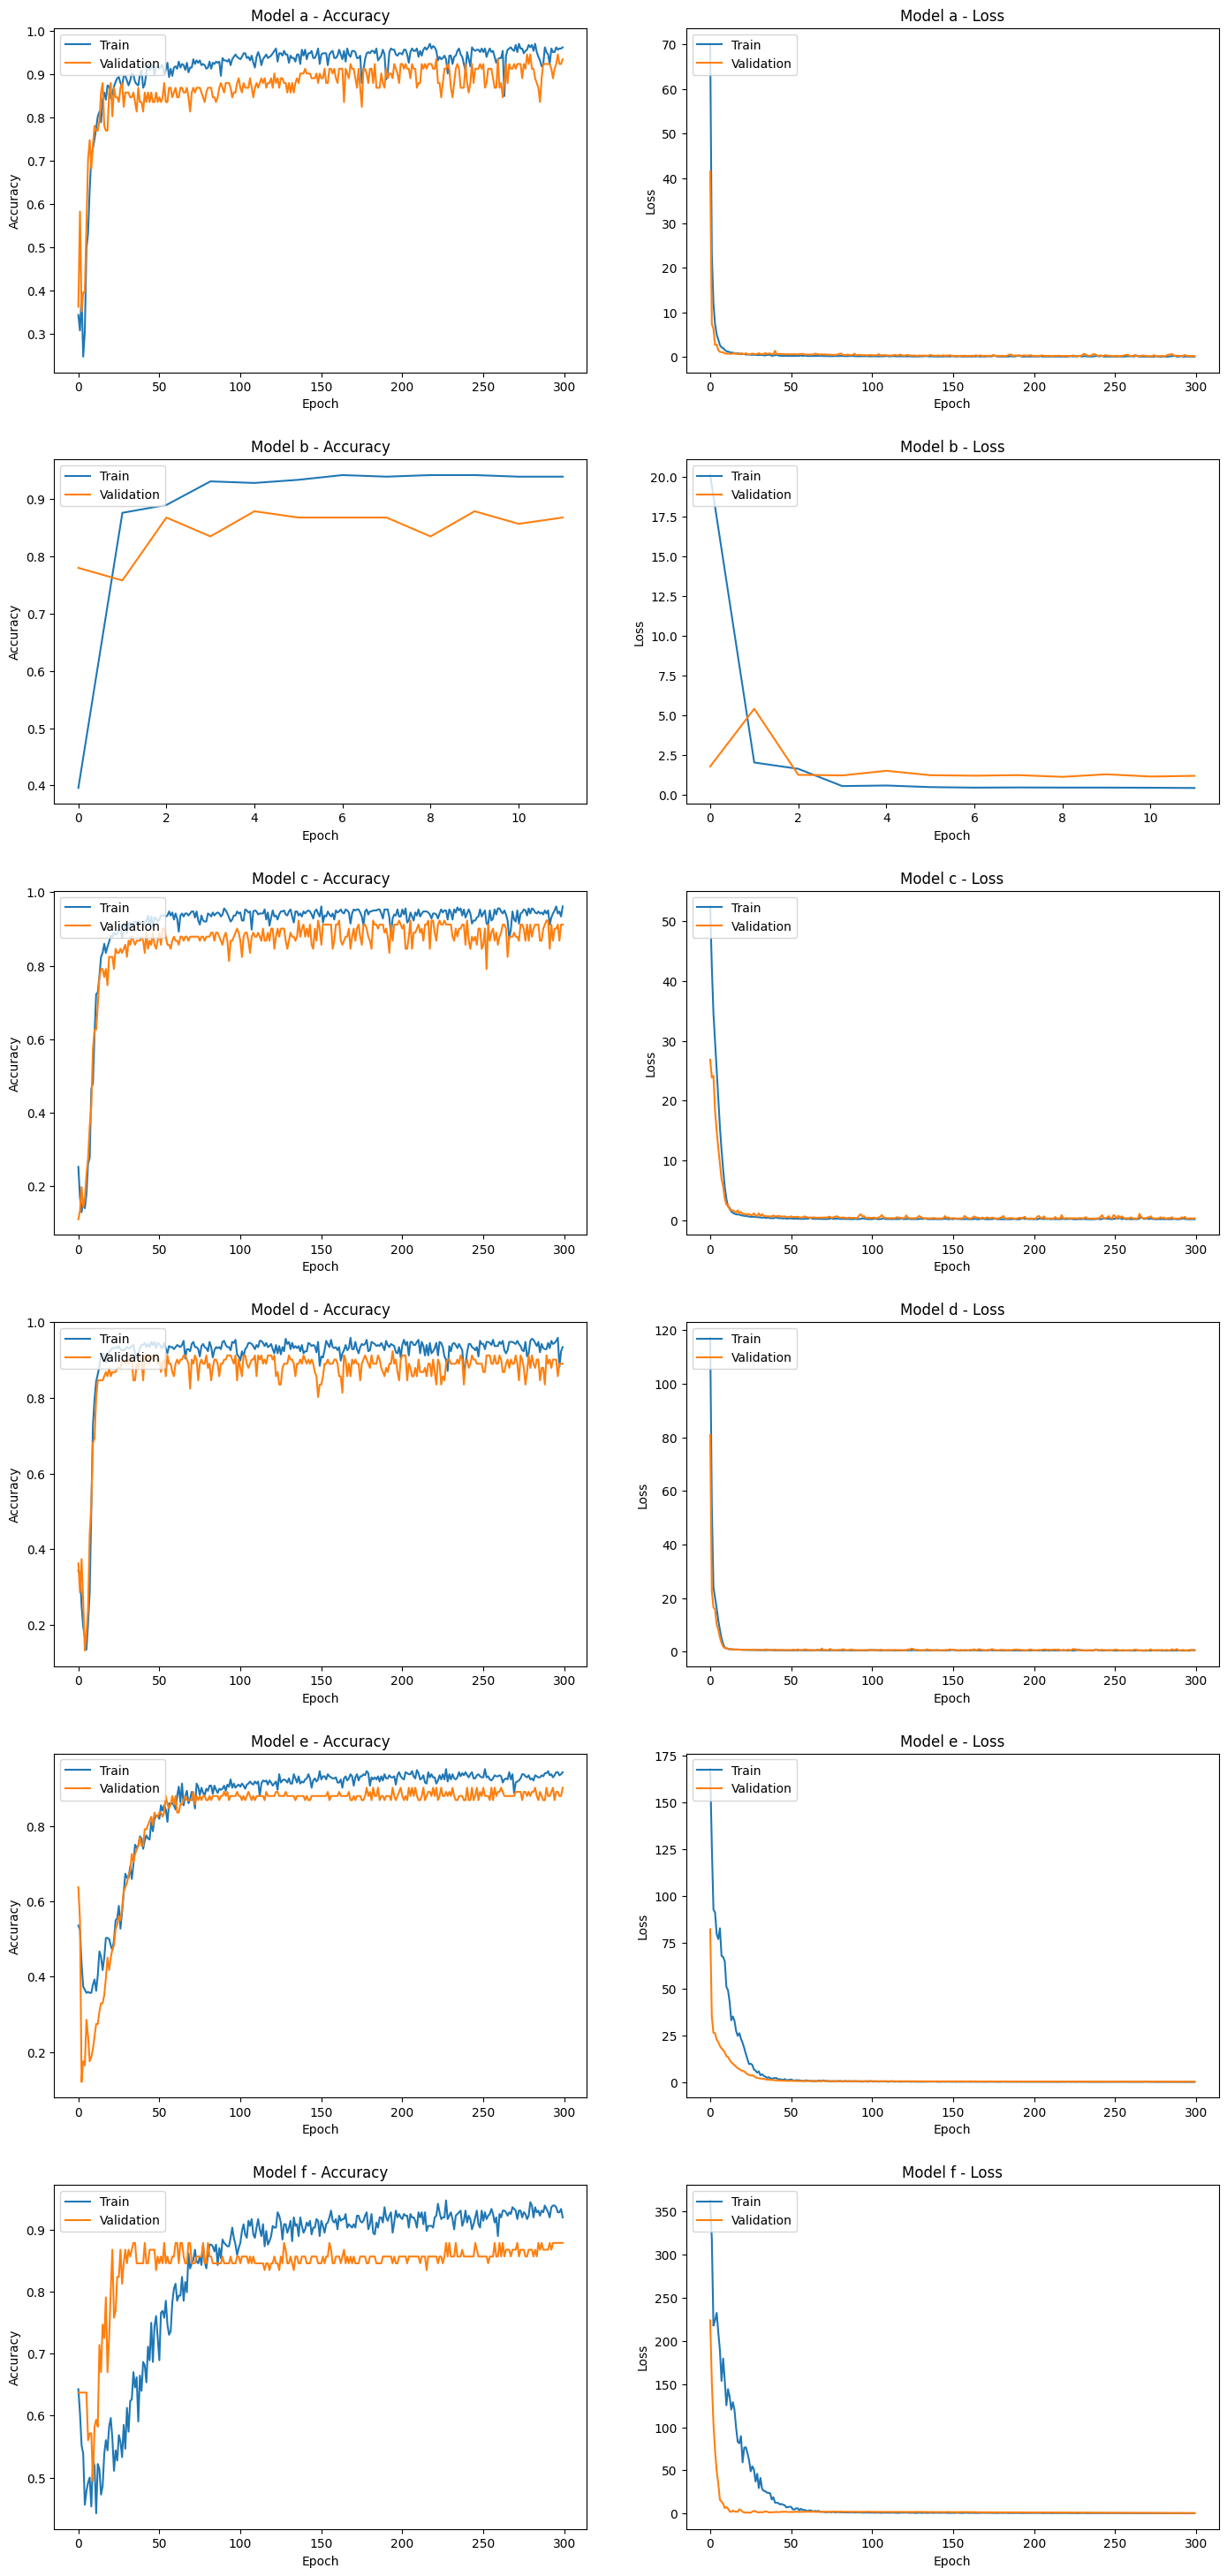

In [36]:
# 5) Choose the best model from the validation accuracy
 # Plot the validation accuracy curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt


histories = [a_history, b_history, c_history, d_history, e_history, f_history]
model_names = ['a', 'b', 'c', 'd', 'e', 'f']

# Create a figure and axes for the plots
fig, axes = plt.subplots(len(model_names), 2, figsize=(15, 5*len(model_names)))
fig.tight_layout(pad=5.0)

for i in range(len(model_names)):
    name = model_names[i]

   # Plot the training and validation accuracy
    axes[i, 0].plot(histories[i].history['binary_accuracy'])
    axes[i, 0].plot(histories[i].history['val_binary_accuracy'])
    axes[i, 0].set_title(f'Model {name} - Accuracy')
    axes[i, 0].set_ylabel('Accuracy')
    axes[i, 0].set_xlabel('Epoch')
    axes[i, 0].legend(['Train', 'Validation'], loc='upper left')


    # Plot the training and validation loss
    axes[i, 1].plot(histories[i].history['loss'])
    axes[i, 1].plot(histories[i].history['val_loss'])
    axes[i, 1].set_title(f'Model {name} - Loss')
    axes[i, 1].set_ylabel('Loss')
    axes[i, 1].set_xlabel('Epoch')
    axes[i, 1].legend(['Train', 'Validation'], loc='upper left')

plt.show()

  # val_acc = history.history['val_binary_accuracy']
#   plt.plot(history.history['val_binary_accuracy'], label=f"Model {model_name}")

# plt.title('Validation Accuracy Curves')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')
# plt.legend()
# plt.show()

In [53]:
# 4) Evaluate the models on the test dataset using the checkpoint callback

a_net2n = tf.keras.models.load_model('model_a_checkpoint.keras')
b_net2n = tf.keras.models.load_model('model_b_checkpoint.keras')
c_net2n_reg = tf.keras.models.load_model('model_c_checkpoint.keras')
d_net2n_reg = tf.keras.models.load_model('model_d_checkpoint.keras')
e_net2n_reg = tf.keras.models.load_model('model_e_checkpoint.keras')
f_net2n_reg = tf.keras.models.load_model('model_f_checkpoint.keras')

a_predcitions = a_net2n.predict(X_test)
b_predcitions = b_net2n.predict(X_test)
c_predcitions = c_net2n_reg.predict(X_test)
d_predcitions = d_net2n_reg.predict(X_test)
e_predcitions = e_net2n_reg.predict(X_test)
f_predcitions = f_net2n_reg.predict(X_test)

a_score = a_net2n.evaluate(X_test, y_test)
b_score = b_net2n.evaluate(X_test, y_test)
c_score = c_net2n_reg.evaluate(X_test, y_test)
d_score = d_net2n_reg.evaluate(X_test, y_test)
e_score = e_net2n_reg.evaluate(X_test, y_test)
f_score = f_net2n_reg.evaluate(X_test, y_test)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - binary_accuracy: 0.9452 - false_negatives_7: 2.6000 - loss: 0.2026      
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - binary_accuracy: 0.8713 - false_negatives_8: 7.6000 - loss: 1.2223  
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - binary_accuracy: 0.9069 - false_negatives_9: 6.0000 - loss: 0.3541  
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - binary_accuracy: 0.9288 - false_negatives_10: 4.0000 - loss: 0.4923  
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - binary_accuracy: 0.9124 - false_negatives_11: 6.0000 - loss: 0.3547  
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - binary_accuracy: 0.8745 - false_negatives_12: 8.2000 - loss: 0.7037  


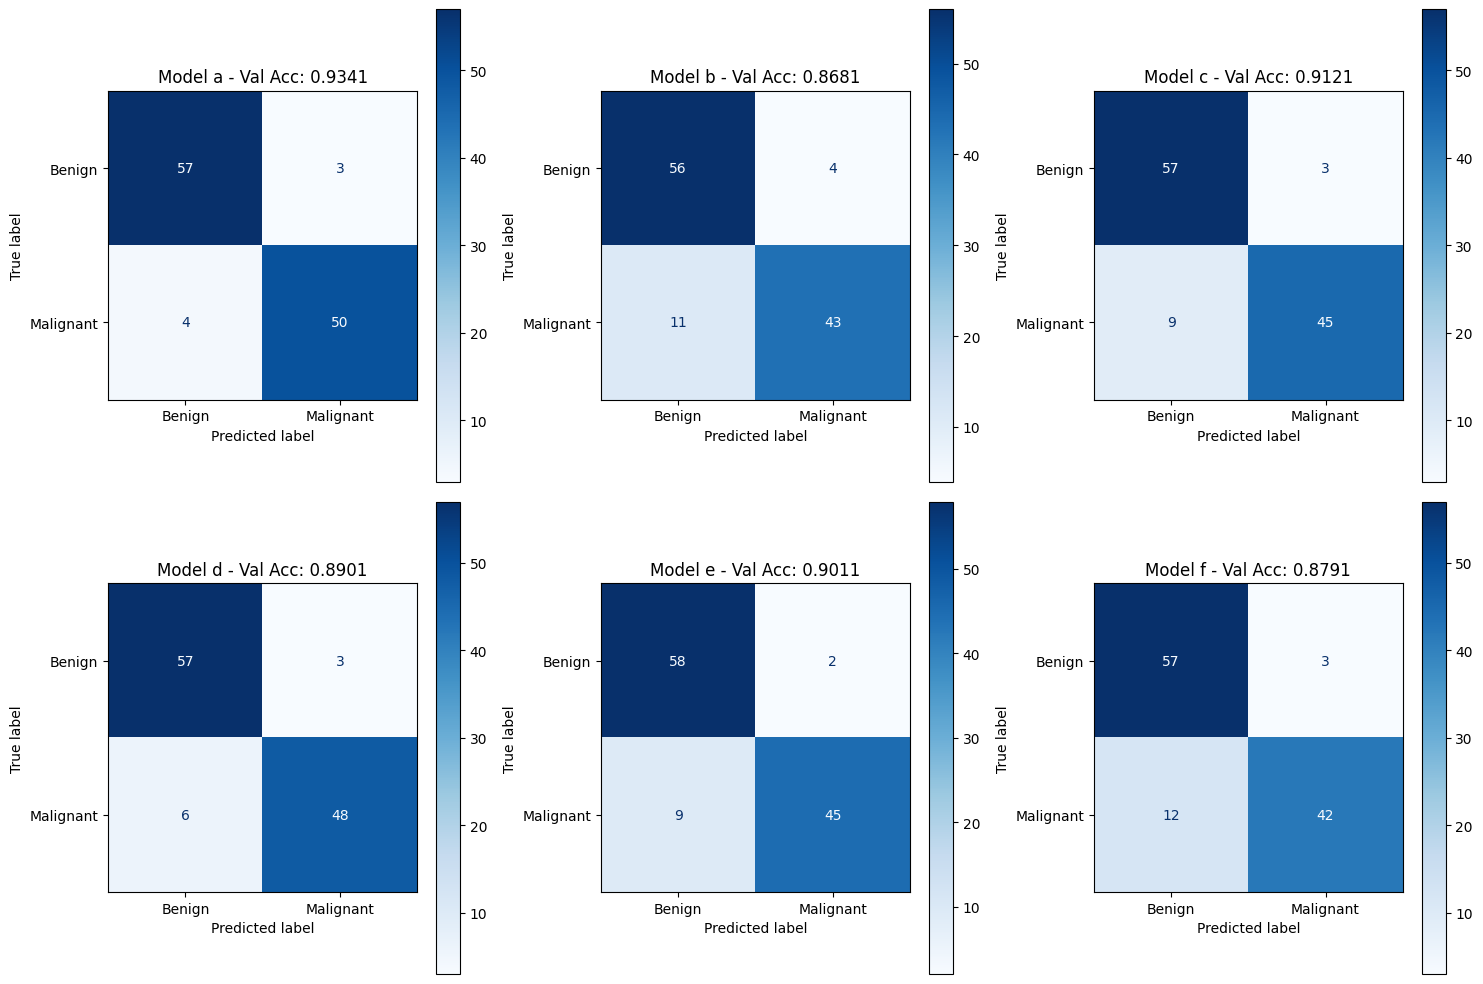

In [54]:
# Plotting some metrics
# Confusion matrix
from matplotlib import pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

class_names = ['Benign', 'Malignant']

predictions = [a_predcitions, b_predcitions, c_predcitions,
               d_predcitions, e_predcitions, f_predcitions]
models = [a_net2n, b_net2n, c_net2n_reg, d_net2n_reg, e_net2n_reg, f_net2n_reg]
histories = [a_history, b_history, c_history, d_history, e_history, f_history]
model_names = ['a', 'b', 'c', 'd', 'e', 'f']

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

for i, (model, pred, history) in enumerate(zip(models, predictions, histories)):
  # Convert predictions to binary classes
  pred_binary = (pred > 0.5).astype(int)
  cm = confusion_matrix(y_test, pred_binary)

  val_acc = history.history['val_binary_accuracy'][-1] # Get validation accuracy

  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
  disp.plot(ax=axes[i//3, i%3], cmap=plt.cm.Blues)
  disp.ax_.set_title(f"Model {model_names[i]} - Val Acc: {val_acc:.4f}") # Add validation accuracy to title

plt.tight_layout()
plt.show()

Evaluating model: a
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Evaluating model: b
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Evaluating model: c
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Evaluating model: d
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Evaluating model: e
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Evaluating model: f
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


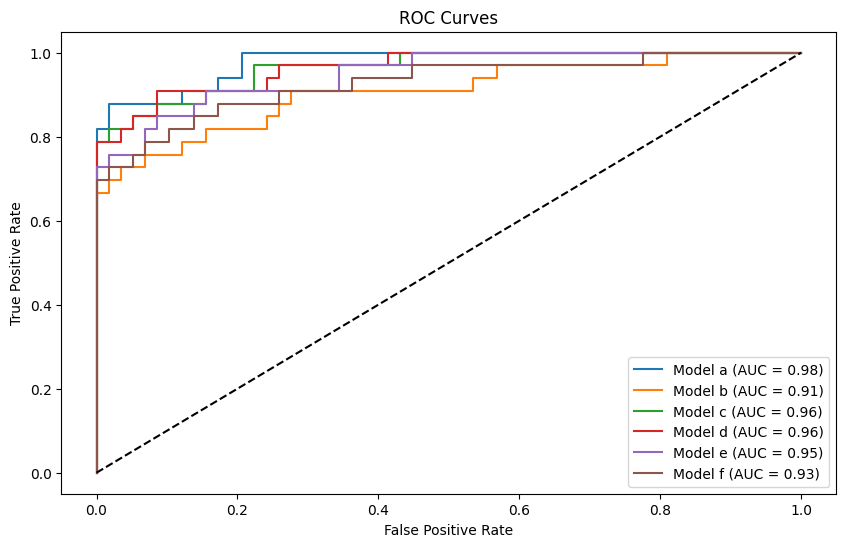

In [55]:
# 5) Checking all the models ROC curves to choose the best model
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import roc_curve, auc

# Create a dictionary of models
models = {
    'a': a_net2n,
    'b': b_net2n,
    'c': c_net2n_reg,
    'd': d_net2n_reg,
    'e': e_net2n_reg,
    'f': f_net2n_reg,
}

# Plotting ROC curves

roc_values = []

plt.figure(figsize=(10, 6))
for name, model in models.items():
    print(f"Evaluating model: {name}")
    y_pred = model.predict(X_val)
    y_pred = y_pred.flatten()
    fpr, tpr, _ = roc_curve(y_val, y_pred)
    roc_auc = auc(fpr, tpr)
    roc_values.append((name, roc_auc))

    plt.plot(fpr, tpr, label=f'Model {name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.show()

The best model is a
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


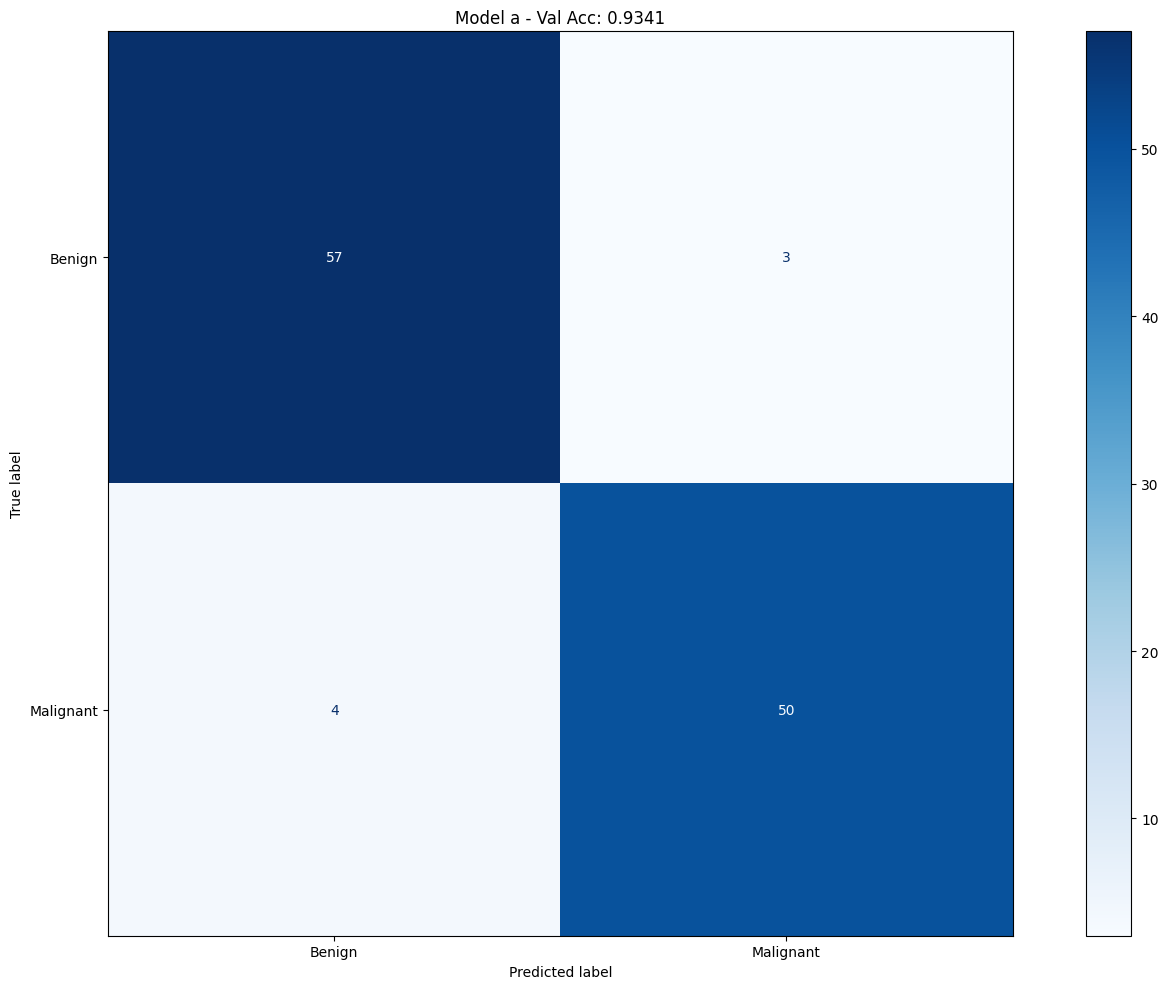

In [57]:
# 6) Evaluate the best model on the test dataset

# Get the best model
index_best_model = roc_values.index(max(roc_values, key=lambda x: x[1]))
best_model_name = roc_values[index_best_model][0]
best_model = models[best_model_name]
print(f"The best model is {best_model_name}")

fig, axes = plt.subplots(1, 1, figsize=(15, 10))

# Convert predictions to binary classes
pred = best_model.predict(X_test)
pred_binary = (pred > 0.5).astype(int)
cm = confusion_matrix(y_test, pred_binary)

val_acc = histories[index_best_model].history['val_binary_accuracy'][-1] # Get validation accuracy

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)

# Since you only have 1 Axes object, you should plot directly on 'axes'
disp.plot(ax=axes, cmap=plt.cm.Blues)
disp.ax_.set_title(f"Model {model_names[index_best_model]} - Val Acc: {val_acc:.4f}") # Add validation accuracy to title

plt.tight_layout()
plt.show()


Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_51 (Dense)                     │ (None, 16)                  │             496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_52 (Dense)                     │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_53 (Dense)                     │ (None, 4)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_54 (Dense)                     │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 673 (2.63 KB)

 Trainable params: 673 (2.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/300
12/12 - 4s - 296ms/step - binary_accuracy: 0.3901 - false_negatives_16: 58.0000 - loss: 12.3614 - val_binary_accuracy: 0.6044 - val_false_negatives_16: 13.0000 - val_loss: 4.9808
Epoch 2/300
12/12 - 0s - 24ms/step - binary_accuracy: 0.4698 - false_negatives_16: 52.0000 - loss: 9.4844 - val_binary_accuracy: 0.7253 - val_false_negatives_16: 14.0000 - val_loss: 4.1840
Epoch 3/300
12/12 - 0s - 12ms/step - binary_accuracy: 0.5275 - false_negatives_16: 36.0000 - loss: 7.0337 - val_binary_accuracy: 0.8022 - val_false_negatives_16: 15.0000 - val_loss: 4.4776
Epoch 4/300
12/12 - 0s - 12ms/step - binary_accuracy: 0.6401 - false_negatives_16: 36.0000 - loss: 5.7495 - val_binary_accuracy: 0.7473 - val_false_negatives_16: 12.0000 - val_loss: 2.9777
Epoch 5/300
12/12 - 0s - 10ms/step - binary_accuracy: 0.6896 - false_negatives_16: 31.0000 - loss: 4.8450 - val_binary_accuracy: 0.8132 - val_false_negatives_16: 12.0000 - val_loss: 2.8259
Epoch 6/300
12/12 - 0s - 13ms/step - binary_accuracy:

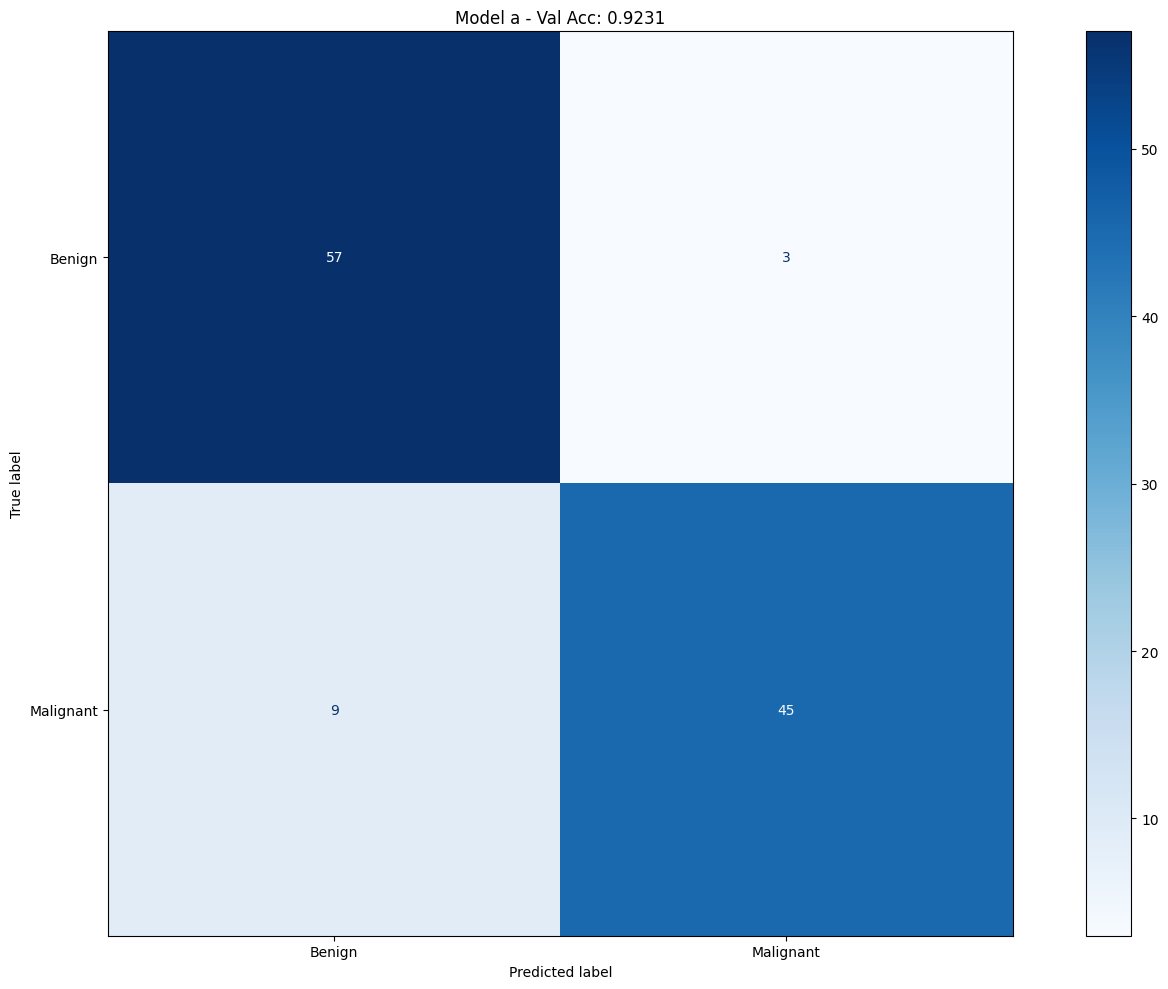

In [61]:
# 7) Adding more layers in best model

a_model_plus = tf.keras.Sequential()
a_model_plus.add(tf.keras.Input(shape=(30,)))
a_model_plus.add(tf.keras.layers.Dense(16))
a_model_plus.add(tf.keras.layers.Dense(8))
a_model_plus.add(tf.keras.layers.Dense(4))
a_model_plus.add(tf.keras.layers.Dense(1, activation="sigmoid"))
a_model_plus.summary()

a_model_plus.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=[
        tf.keras.metrics.BinaryAccuracy(),
        tf.keras.metrics.FalseNegatives()]
        )

history = a_model_plus.fit(
      X_train, y_train,
      epochs=EPOCHS,
      validation_data=(X_val, y_val),
      verbose=2,
      )

fig, axes = plt.subplots(1, 1, figsize=(15, 10))

# Convert predictions to binary classes
pred = a_model_plus.predict(X_test)
pred_binary = (pred > 0.5).astype(int)
cm = confusion_matrix(y_test, pred_binary)

val_acc = history.history['val_binary_accuracy'][-1] # Get validation accuracy

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)

# Since only have 1 Axes object, you should plot directly on 'axes'
disp.plot(ax=axes, cmap=plt.cm.Blues)
disp.ax_.set_title(f"Model {model_names[index_best_model]} - Val Acc: {val_acc:.4f}") # Add validation accuracy to title

plt.tight_layout()
plt.show()
